# **Kernel Principal Component Analysis using MATLAB** 

CREDITS: **Kepeng  Qiu**

PROFILE: https://github.com/iqiukp

GITHUB REPO: https://github.com/iqiukp/Kernel-Principal-Component-Analysis-KPCA


---

---

This notebook is the explanation of the MATLAB code for performing KPCA. Two different problems of Dimensionality Reduction and Fault Detection are discussed here. 

In the MATLAB code, two main classes are defined. 1st is the `kernelMatrix` which defines the type of kernel function (e.g. gauss, exponential, etc) being used and 2nd is the main `KernelPCA` which performs tasks like Non-linear Dimensionality Reduction (and Reconstruction), fault detection and fault diagnosis. The details of these two classes are defined below (with details about the parameters they take as inputs):

- `KernelMatrix`:

 Computes the kernel matrix using different kernel functions defined below.
      kernel = Kernel('type', 'gauss', 'width', 2);
      kernel = Kernel('type', 'exp', 'width', 2);
      kernel = Kernel('type', 'linear', 'offset', 0);
      kernel = Kernel('type', 'lapl', 'width', 2);
      kernel = Kernel('type', 'sigm', 'gamma', 0.1, 'offset', 0);
      kernel = Kernel('type', 'poly', 'degree', 2, 'offset', 0);

- `KernelPCA`:

 Performs Non-linear Dimensionality Reduction (and Reconstruction), fault detection and fault diagnosis. An object is first defined using this class specifying the application and paramter. e.g. `kpca = KernelPCA(parameter);`

 Parameter take in several values defined below.
    
      Structures Description of 'parameter'

            application:       dimensionality reduction (dr) or fault detection (fd)
            dim:               dimensionality
            tol:               tolerance for eigenvalues
            alpha:             hyperparameter of the ridge regression that learns the reconstruction
            explained:         percent variability explained by principal components
            kernel:            kernel function
            significanceLevel: significance level (fault detection)
            theta:             experience parameter of fault diagnosis 
            display:           display the results

## Dimensionality Reduction (and Reconstruction)



Following are the steps to perform Dimensionality Reduction:

- We first have to load the dataset provided using the command:
  ```
  % load data
  load('.\data\circle.mat')   
  X = data(:, 1:2);
  label = data(:, 3);
  ```
  The labels are just extracted to be used for visualization during plotting.

  The plot for the data is shown below:



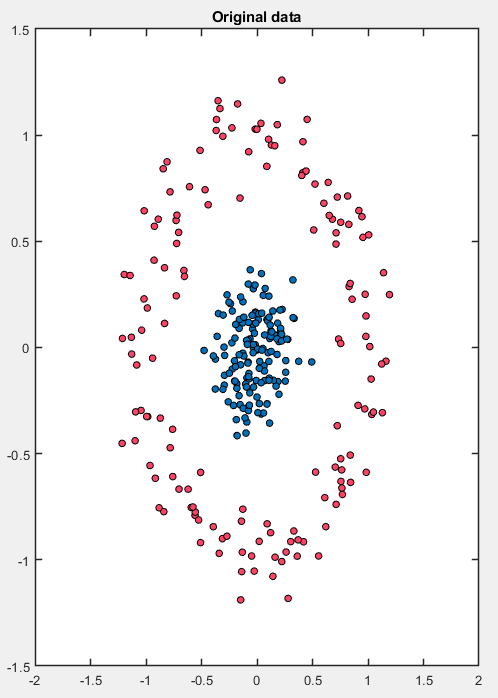

- The Kernel Function is next set using:

  `kernel = Kernel('type', 'gauss', 'width', 0.5);`

  Here the type of kernel used is `gauss`. The very first input to the class 'Kernel' defines the variable (i.e. `'type'` in this case) and the input that follows it assigns the value to it (i.e. `'gauss'`). 

  Other Kernel types can also be used and the ones supported are defined in the cell above. Example of others can be polynomial (`'poly'`), Linear (`'linear'`), exponential (`'exp'`), etc.  

- The next step is to define the paramters to the main `KernelPCA` class and define the object which in turn will be used to perform PCA.

  - First parameters are defined using the command: 
  
    `parameter = struct('application', 'dr', 'dim', 2, 'kernel', kernel);`

    Here we have set the `application` that we want to perform, i.e.`'dr'` (which stands for dimensionality reduction). Then the dimensions are defined as `2` and finally we set the `kernel` defined in the pervious step.

  - The object named `kpca` is then defined and parameters set in the above step are passed to it:

    `kpca = KernelPCA(parameter);`

- The final step is to train the KPCA model using the data and visualizing the results.
 
  ```
  % train KPCA model using given data
  X_map = kpca.train(X);
  % Visualize the mapping data
  Visualization.map(X, X_map, label);
```
Plot after performing KPCA is shown below:


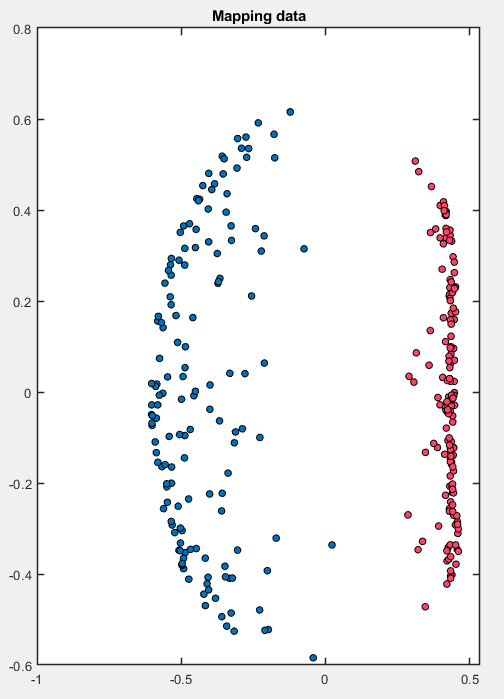

Reconstruction can only be done to the above plotted dataset. It is done using the command :

`X_re = kpca.reconstruct;`

Plot for the reconstructed data shown below

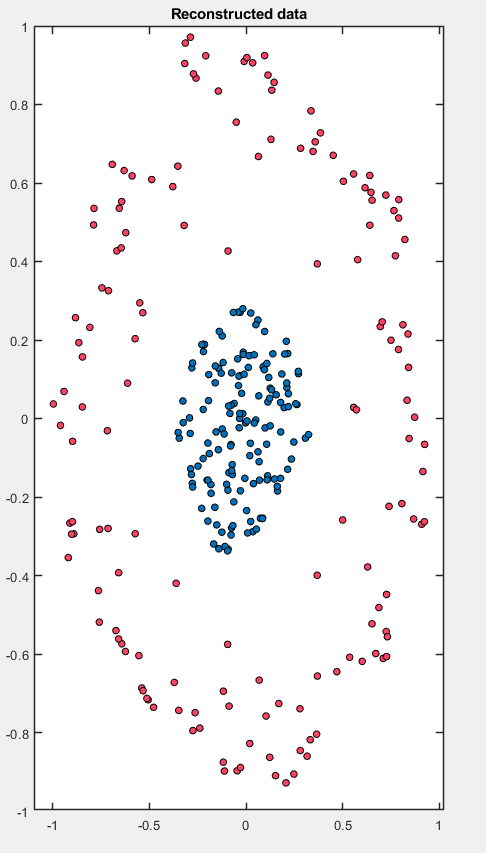

Similar dimensionality reduction can be done for banana dataset by changing the load data command to `load('.\data\banana.mat')`

Results are as follows:

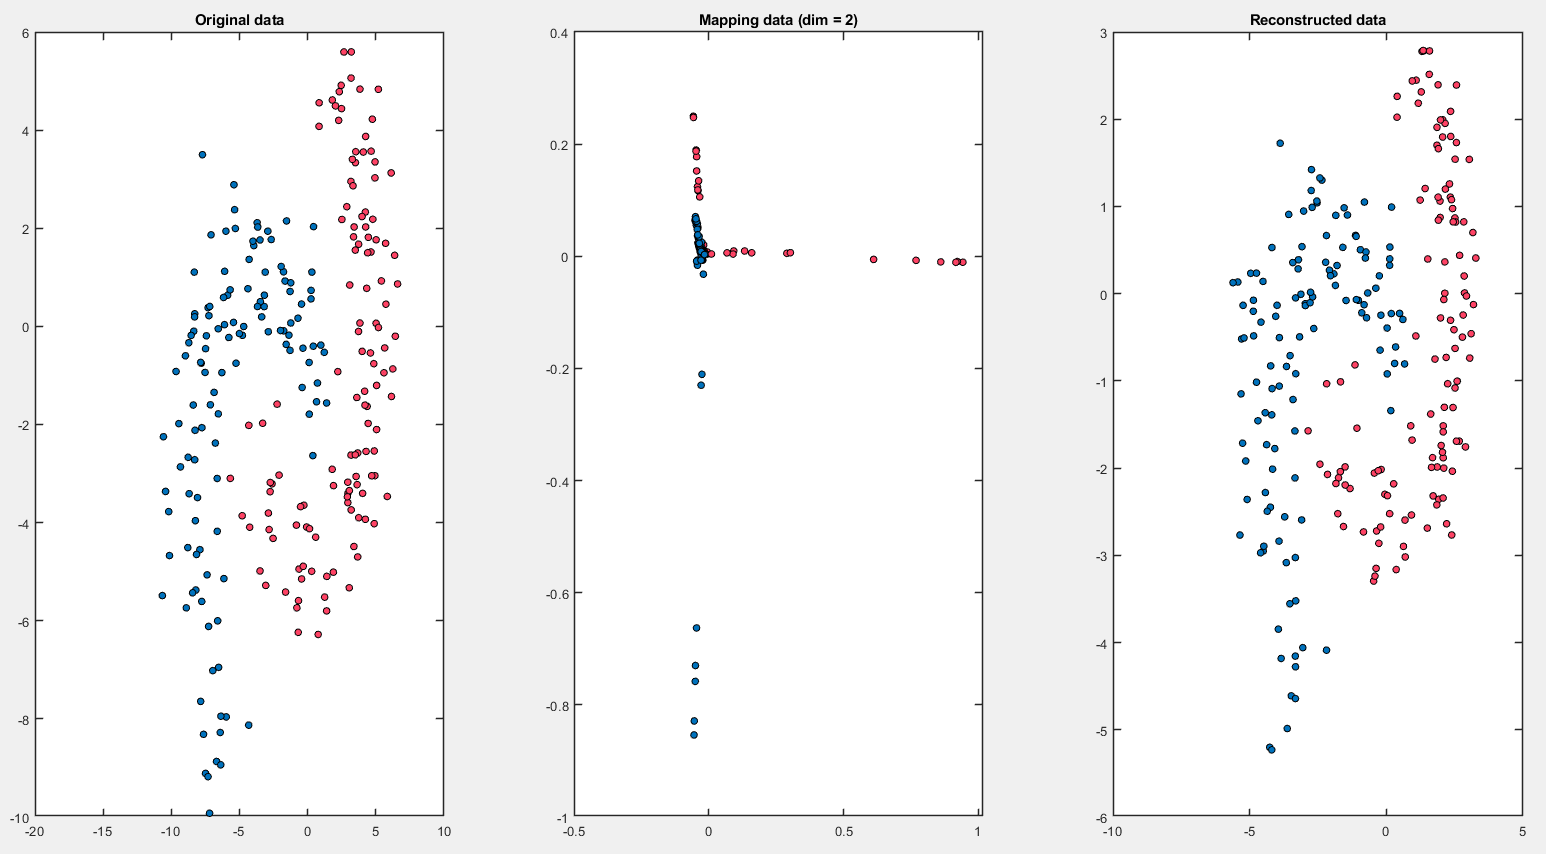

**Complete code for Dimensionality Reduction and Reconstruction**

```

%  Examples for dimensionality reduction based on KPCA
% --------------------------------------------------------------------

clc
clear all
close all
addpath(genpath(pwd))

% load data
load('.\data\circle.mat')   
X = data(:, 1:2);
label = data(:, 3);
% set kernel function
kernel = Kernel('type', 'gauss', 'width', 0.5);
% parameter setting
parameter = struct('application', 'dr', 'kernel', kernel);
% build a KPCA object
kpca = KernelPCA(parameter);
% train KPCA model using given data
X_map = kpca.train(X);
% reconstruct the mapping data
X_re = kpca.reconstruct;
% Visualize the reconstruction
Visualization.reconstruct(X, X_map, X_re, label);
```

Running the above code gives the output:



```
*** KPCA model training finished ***
dimensionality             =  122 
time cost                  =  0.2822 s
```

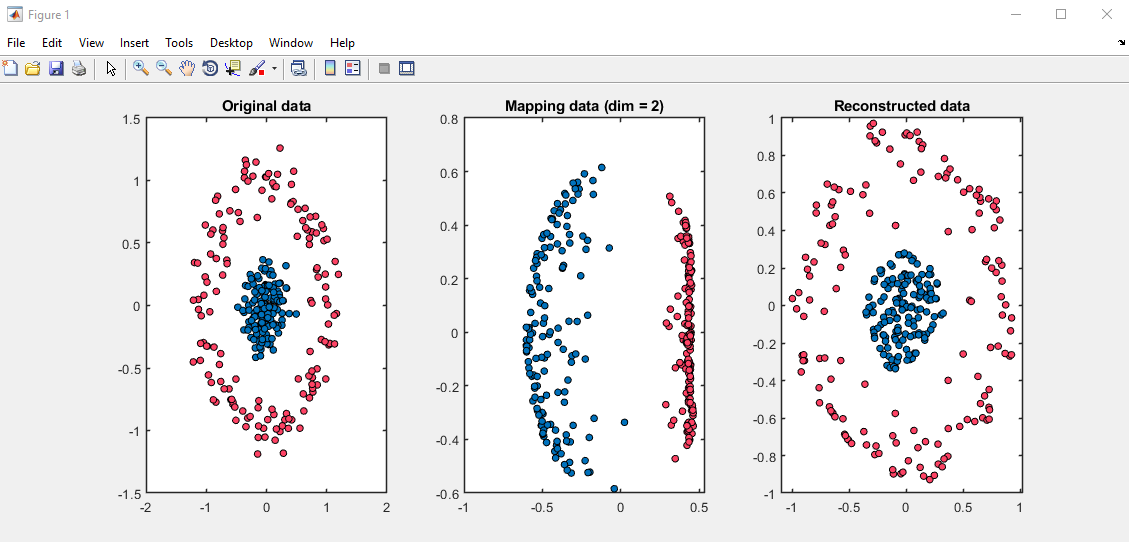

## Fault Detection and Diagnosis

Following are the steps to perform Fault Detection and Fault Diagnosis:

- We first have to load the dataset provided using the command:
  ```
  % load the training data
load('.\data\teprocess.mat')
  ```
  Dataset consists of `traindata` and `testdata`. `traindata` has a total of 500 examples and 52 features in each of them (i.e. $500 \times 52$ dimensional). Similarly `testdata` has a total of 960 examples and 52 features in each of them (i.e. $960 \times 52$ dimensional).



- The Kernel Function is next set using:

  `kernel = Kernel('type', 'gauss', 'width', 128);`

  Here the type of kernel used is `gauss`. The very first input to the class 'Kernel' defines the variable (i.e. `'type'` in this case) and the input that follows it assigns the value to it (i.e. `'gauss'`). 

  Other Kernel types can also be used and the ones supported are defined in the cell above. Example of others can be polynomial (`'poly'`), Linear (`'linear'`), exponential (`'exp'`), etc.  

- The next step is to define the paramters to the main `KernelPCA` class and define the object which in turn will be used to perform PCA.

  - First parameters are defined using the command: 
  
    `parameter = struct('application', 'fd', 'kernel', kernel);`

    Here we have set the `application` that we want to perform, i.e.`'fd'` (which stands for fault detection). Then the `kernel` defined in the pervious step.

  - The object named `kpca` is then defined and parameters set in the above step are passed to it:

    `kpca = KernelPCA(parameter);`

- The final step is to train the KPCA model using the `traindata` and then predict on the `testdata`. This is then followed by visualization of the results.
 
  ```
  % train KPCA model
kpca.train(traindata);
% test KPCA model
kpca.test(testdata);
% Visualize the prediction
Visualization.prediction(kpca);
```
Visualization is shown below:


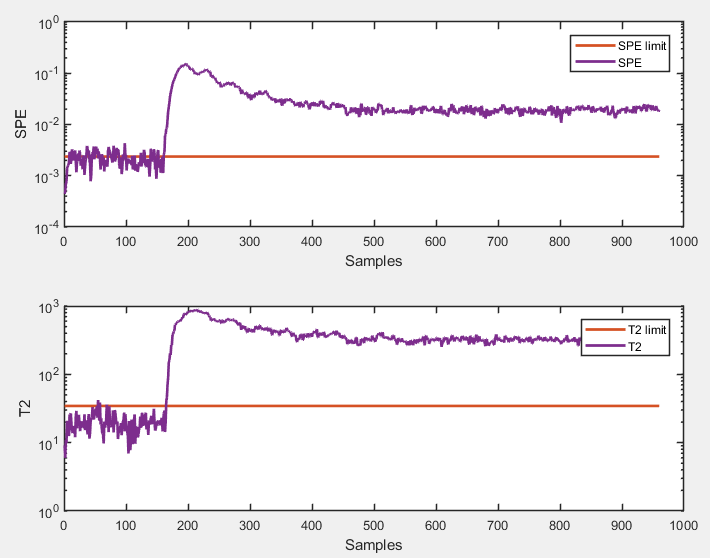

Fault Diagnosis is done using a single line command `kpca.diagnose('start_time', 301, 'end_time', 500)`.

The detailed information regarding fault diagnosis is described below:

- If you want to calculate CPS of a certain time, you should set starting time equal to ending time. For example, `start_time` = 500, `end_time` = 500.

- If you want to calculate the average CPS of a period of time, starting time and ending time should be set respectively. For example `start_time` = 300, `end_time` = 500.
 
- The fault diagnosis module is only supported for gaussian kernel function and it may still take a long time when the number of the training data is large.



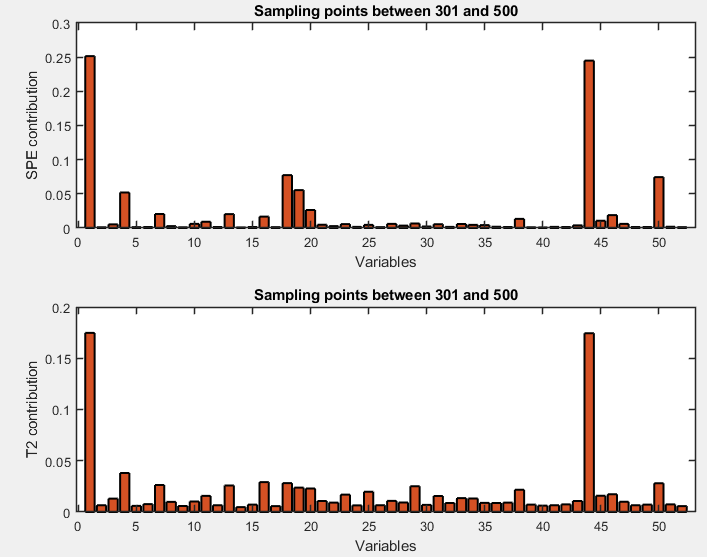

**Complete code for Fault Detection and Diagnosis**

```

%  Examples for fault detection based on KPCA
% --------------------------------------------------------------------

clc
clear all
close all
addpath(genpath(pwd))

% load the training data
load('.\data\teprocess.mat')

% kernel function
kernel = Kernel('type', 'gauss', 'width', 128);

% parameter setting
parameter = struct('application', 'fd', 'kernel', kernel);

% build a KPCA object
kpca = KernelPCA(parameter);

% train KPCA model
kpca.train(traindata);

% test KPCA model
kpca.test(testdata);

% Visualize the prediction
Visualization.prediction(kpca);

%{
fault diagnosis

Notice:  

 (1)     If you want to calculate CPS of a certain time, you should 
         set starting time equal to ending time. For example, 
         startingtime = 500, endingtime = 500.

 (2)     If you want to calculate the average CPS of a period of time,
         starting time and ending time should be set respectively. 
         For example startingtime = 300, endingtime = 500.
 
 (3)     The fault diagnosis module is only supported for gaussian 
         kernel function and it may still take a long time when 
         the number of the training data is large.

------------------------------------------------------------------------
%}
kpca.diagnose('start_time', 301, 'end_time', 500)

% Visualize the diagnosis results
Visualization.diagnose(kpca);
```

The output after running the above code:

```
*** KPCA model training finished ***
dimensionality             =  21 
number of T2 alarm         =  11 
number of SPE alarm        =  23 
FAR of SPE                 =  4.6000% 
FAR of T2                  =  2.2000% 
time cost                  =  0.0253 s


*** KPCA model test finished ***
number of test data        =  960 
number of T2 alarm         =  799 
number of SPE alarm        =  858 
time cost                  =  0.0372 s


Fault diagnosis start...
Fault diagnosis finished
time cost 95.7179 s
```

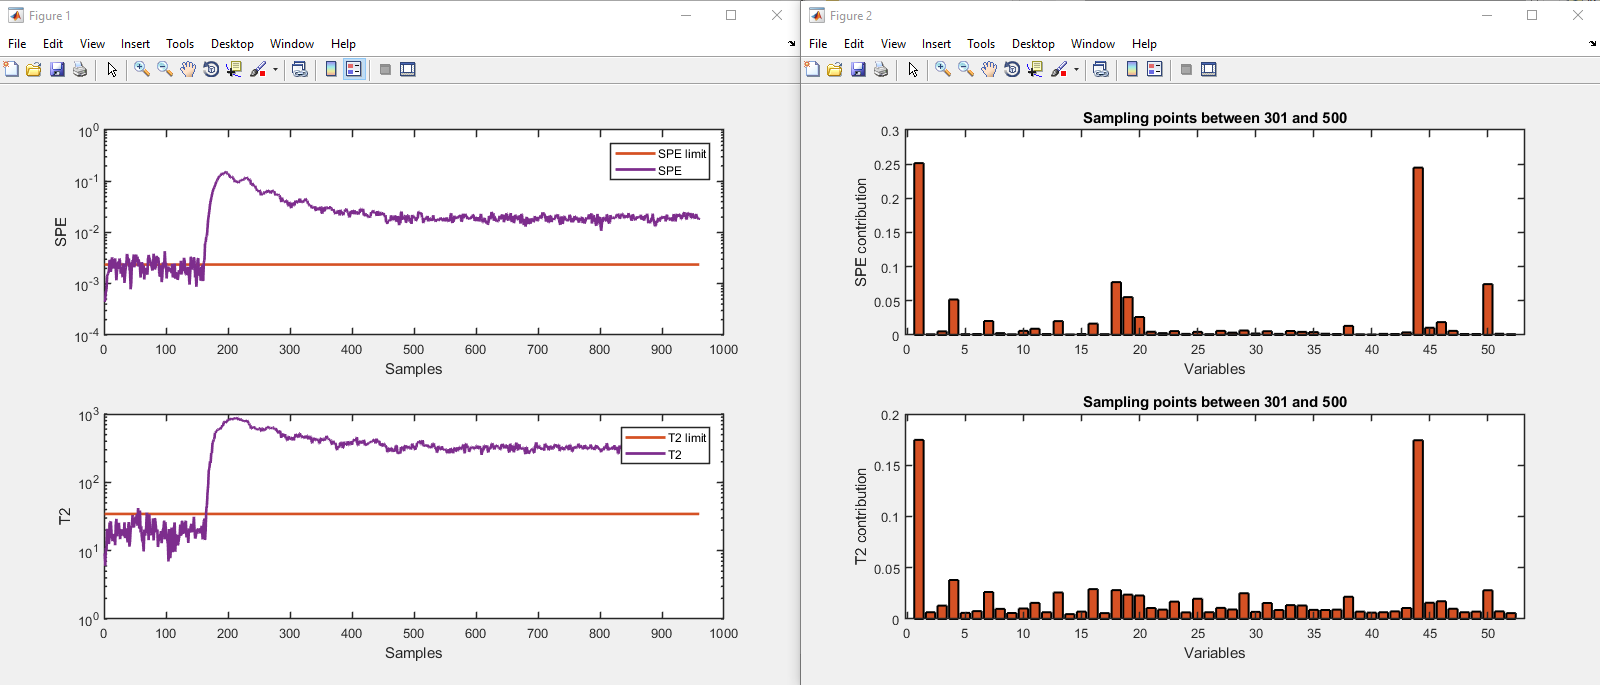